# Importing Libraries


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sqlite3
from scipy.stats import ttest_ind
import scipy.stats as stats
warnings.filterwarnings('ignore')

In [190]:
#Loading Database connection
conn= sqlite3.connect('Inventory.db')

#fetching vendor summary data
df=pd.read_sql_query("select * from vendor_sales_summary",conn)
df


,VendorNumber,VendorName,Brand,description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,28091.0,1010995.09,176243.03,51613.12,68601.68,-2800256.51,-276.980228,0.193624,0.265266
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,25738.0,778309.18,143584.85,47289.99,144929.24,-3025732.04,-388.757080,0.156903,0.204601
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,33865.0,854808.35,125796.25,62222.65,123780.22,-2563495.33,-299.891236,0.180703,0.250068
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,54717.0,1218754.83,115832.05,100538.39,257032.07,-2042443.11,-167.584412,0.271303,0.373714
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,29480.0,903411.20,140072.59,54165.80,257032.07,-2119794.81,-234.643406,0.213455,0.298826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10687,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,3.0,5.97,5.97,0.33,27100.41,3.33,55.778894,1.500000,2.261364
10688,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,128.0,62.72,0.98,6.72,50293.62,60.38,96.269133,21.333333,26.803419
10689,3924,HEAVEN HILL DISTILLERIES,9123,Deep Eddy Vodka,0.74,0.99,50.0,2,1.48,0.0,0.00,0.00,0.00,14069.87,-1.48,-inf,0.000000,0.000000
10690,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,8.0,15.92,9.95,1.68,257032.07,14.45,90.766332,8.000000,10.829932


# Exploratory Data Analysis
- Previously, we examplined the various tables in the databse to indetify key varibales, understand their relationship and determine which ones should be included in the final analysis.
- In this phase of EDA, we will analyze the resultant table to gain insights into the distribution of each column. This will help us understand data patterns indentify anamalies, and ensure data quality before proceeding with further analysis.


# Summary Statistics

In [15]:
df.describe()

,VendorNumber,Brand,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
count,10692.000000,10692.000000,10692.000000,10692.000000,10692.000000,10692.000000,1.069200e+04,10692.000000,1.069200e+04,10692.000000,10692.000000,10692.000000,1.069200e+04,1.069200e+04,10692.000000,10692.000000
mean,10650.649458,18039.228769,24.385303,35.643671,847.360550,3140.886831,3.010669e+04,653.660587,8.726982e+03,4249.773186,371.851228,61433.763214,-2.137971e+04,-inf,0.629068,0.917249
std,18753.519148,12662.187074,109.269375,148.246016,664.309212,11095.086769,1.230678e+05,2462.284113,3.413929e+04,10931.711299,2350.035951,60938.458032,9.080256e+04,NaN,3.502022,4.857648
min,2.000000,58.000000,0.360000,0.490000,50.000000,1.000000,7.100000e-01,0.000000,0.000000e+00,0.000000,0.000000,0.090000,-3.025732e+06,-inf,0.000000,0.000000
25%,3951.000000,5793.500000,6.840000,10.990000,750.000000,36.000000,4.534575e+02,0.000000,0.000000e+00,0.000000,0.000000,14069.870000,-1.487560e+04,NaN,0.000000,0.000000
50%,7153.000000,18761.500000,10.455000,15.990000,750.000000,262.000000,3.655465e+03,36.500000,7.376550e+02,373.805000,6.035000,50293.620000,-2.346210e+03,-2.505328e+02,0.190331,0.285280
75%,9552.000000,25514.250000,19.482500,28.990000,750.000000,1975.750000,2.073825e+04,365.000000,5.780730e+03,3345.345000,75.775000,79528.990000,-2.078400e+02,-1.215578e+02,0.292256,0.451349
max,201359.000000,90631.000000,5681.810000,7499.990000,20000.000000,337660.000000,3.811252e+06,81447.000000,1.218755e+06,176243.030000,100538.390000,257032.070000,1.130101e+05,9.960955e+01,199.200000,256.114286


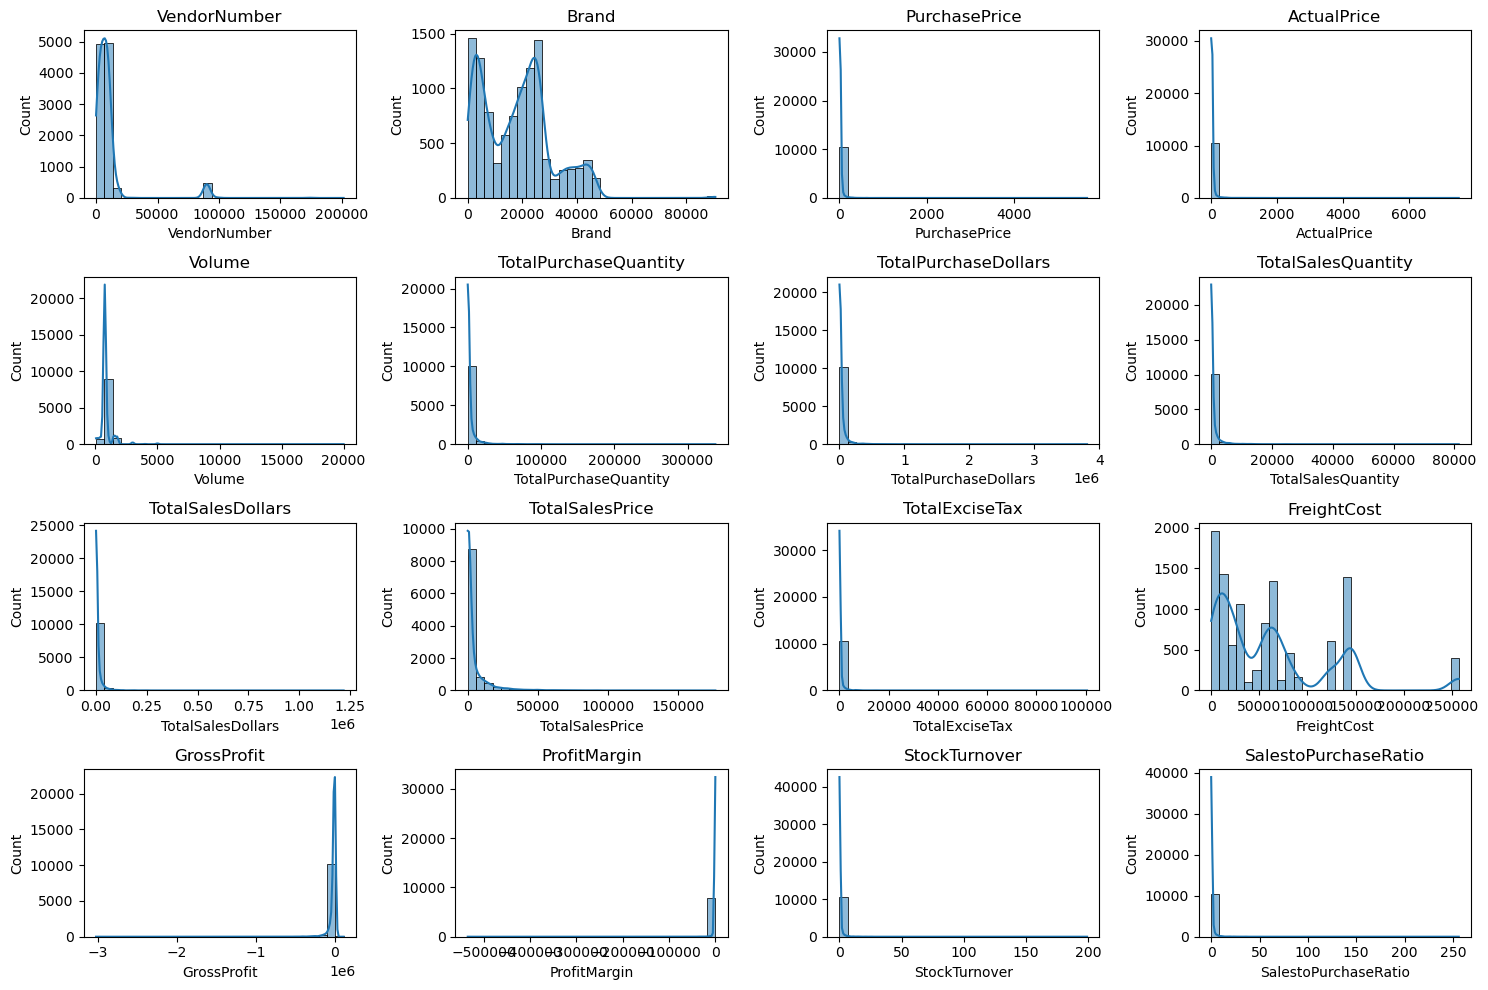

In [18]:
# Distribution Plots for Numerical Columns
numerical_cols=df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1) #adjust grod layout as needed
    sns.histplot(df[col],kde=True,bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

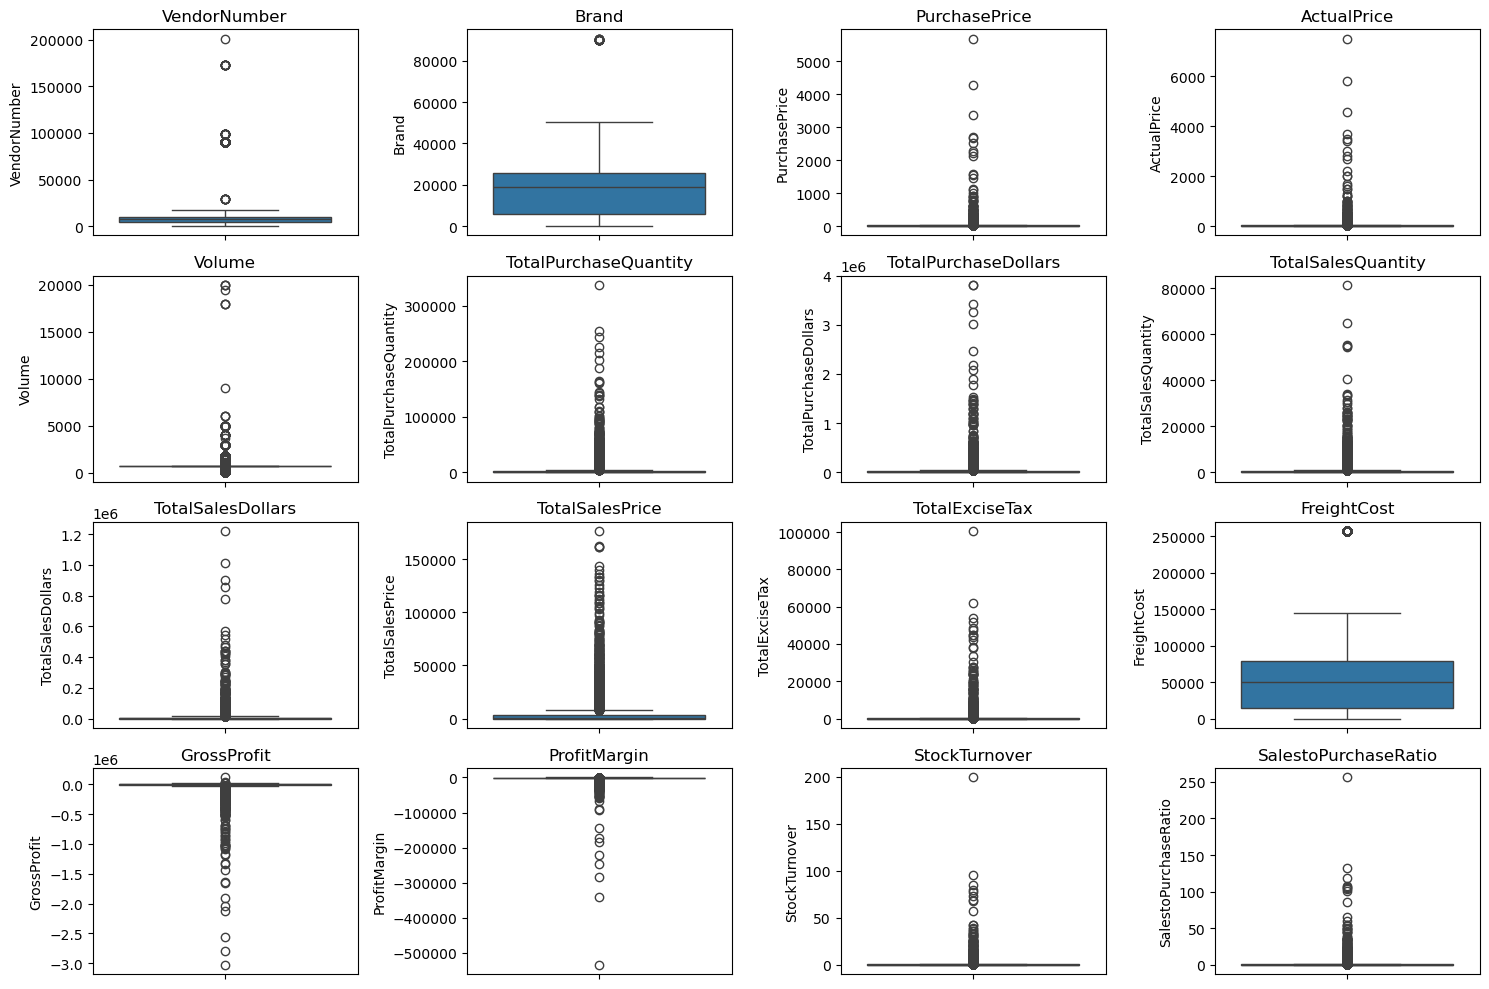

In [20]:
#Outlier Detection with BoxPlots
plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1)
    sns.boxplot(y=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

# Summary Statistics Insights:
**Negative & Zero Values:**

-Gross Profit: Minimum values is -52,002.78, indicating losses. Some products or trasaction may be selling at a loss due to high costs or selling at discounts lower than the purchase price.

-Profit Margin: Has a minimum of -inf, which suggests cases wgere revenue is zero or even lower than costs.

-Total Sales Quantity & Sales Dollars: Minimum Values are 0, meaning some products were purchased but never sold. These could be slow-moving or absolote stock.


**Outliers Indiacted by High Standard Deviations:**

-Purchase & Actual Prices: The max value(5,681.81 & 7,499.99) are significantly higher than the mean (24.39 & 35.64), indicating potential premium products.

-freight Cost: Huge variation,from 0.09 to 257,032.07, suggest logistics ineffcienices or bulk shipments.

-Stock Turnover: Ranges from 0 to 274.5, implying some products sell extremly fast while others remain in stock indefinately. value more than 1 indiacates that Sold quantity for that product is higher than purchased quanity due to either sales are being fulfilled from older stock.


In [23]:
# Lets filter the data by removing inconsistancies 
df=pd.read_sql_query(""" select * from vendor_sales_summary
where GrossProfit >0
AND ProfitMargin >0
AND TotalSalesQuantity>0""",conn)


In [24]:
df

,VendorNumber,VendorName,Brand,description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio
0,12546,JIM BEAM BRANDS COMPANY,1476,Jim Beam Traveler,16.05,21.99,1750.0,11569,185682.45,13143.0,298692.57,80397.56,24147.54,123880.97,113010.12,37.834928,1.136053,1.608620
1,4425,MARTIGNETTI COMPANIES,36380,Sebastiani Znfdl Sonoma Cnty,6.49,9.99,750.0,12309,79885.41,8509.0,85004.91,23936.04,953.43,144929.24,5119.50,6.022593,0.691283,1.064086
2,4425,MARTIGNETTI COMPANIES,25163,Colavita Pnt Nr,3.24,4.99,750.0,10367,33589.08,7069.0,35274.31,5429.12,794.14,144929.24,1685.23,4.777500,0.681875,1.050172
3,3960,DIAGEO NORTH AMERICA INC,2492,Crown Royal Hand Slct Barrel,41.66,54.99,750.0,797,33203.02,789.0,43387.11,5993.91,621.41,257032.07,10184.09,23.472617,0.989962,1.306722
4,4425,MARTIGNETTI COMPANIES,24369,Forefront Pine Ridge Znfdl,8.21,11.99,750.0,3898,32002.58,3052.0,36593.48,15119.39,340.80,144929.24,4590.90,12.545678,0.782966,1.143454
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1384,3960,DIAGEO NORTH AMERICA INC,2626,Crown Royal Apple,1.42,1.99,50.0,2,2.84,12.0,23.88,1.99,0.63,257032.07,21.04,88.107203,6.000000,8.408451
1385,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,3.0,5.97,5.97,0.33,27100.41,3.33,55.778894,1.500000,2.261364
1386,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,128.0,62.72,0.98,6.72,50293.62,60.38,96.269133,21.333333,26.803419
1387,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,8.0,15.92,9.95,1.68,257032.07,14.45,90.766332,8.000000,10.829932


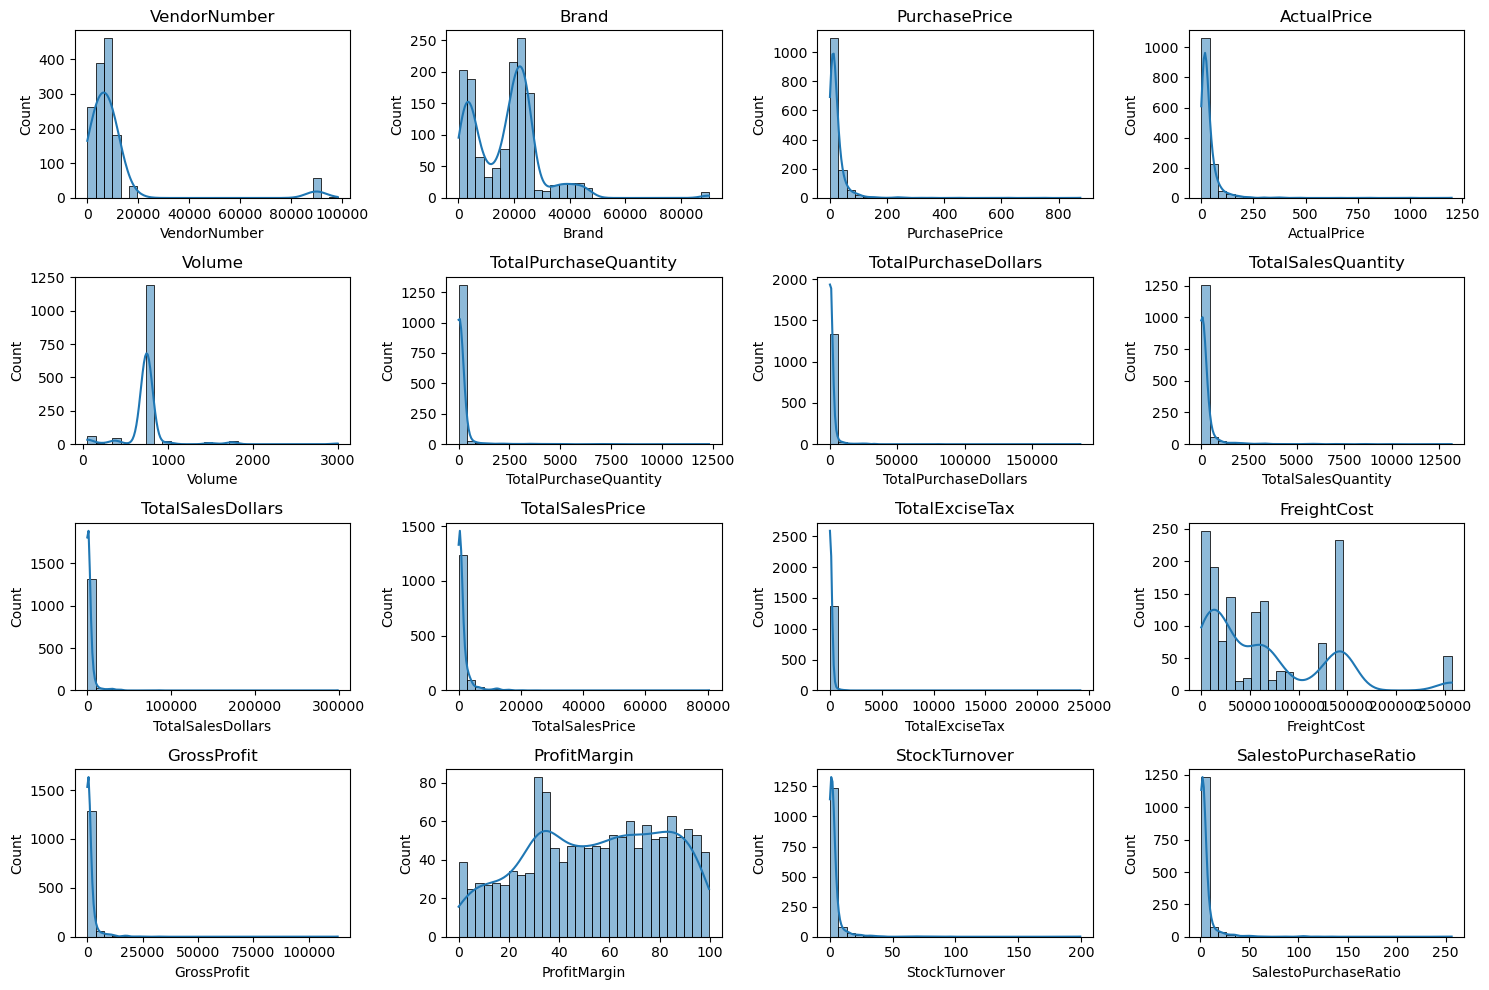

In [25]:
# Distribution Plots for Numerical Columns after removing negative values 
numerical_cols=df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15,10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4,4,i+1) #adjust grod layout as needed
    sns.histplot(df[col],kde=True,bins=30)
    plt.title(col)
plt.tight_layout()
plt.show()

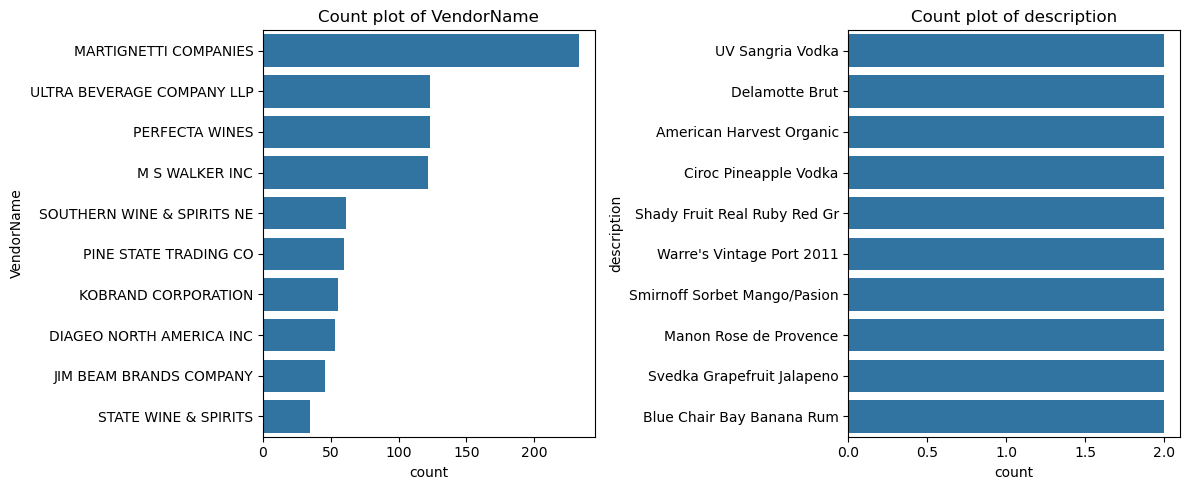

In [29]:
#Count Plots for Categorical Columns
categorical_cols=["VendorName","description"]

plt.figure(figsize=(12,5))
for i,col in enumerate(categorical_cols):
    plt.subplot(1,2,i+1)
    sns.countplot(y=df[col],order=df[col].value_counts().index[:10]) # Top 10 categories
    plt.title(f"Count plot of {col}")
plt.tight_layout()
plt.show()

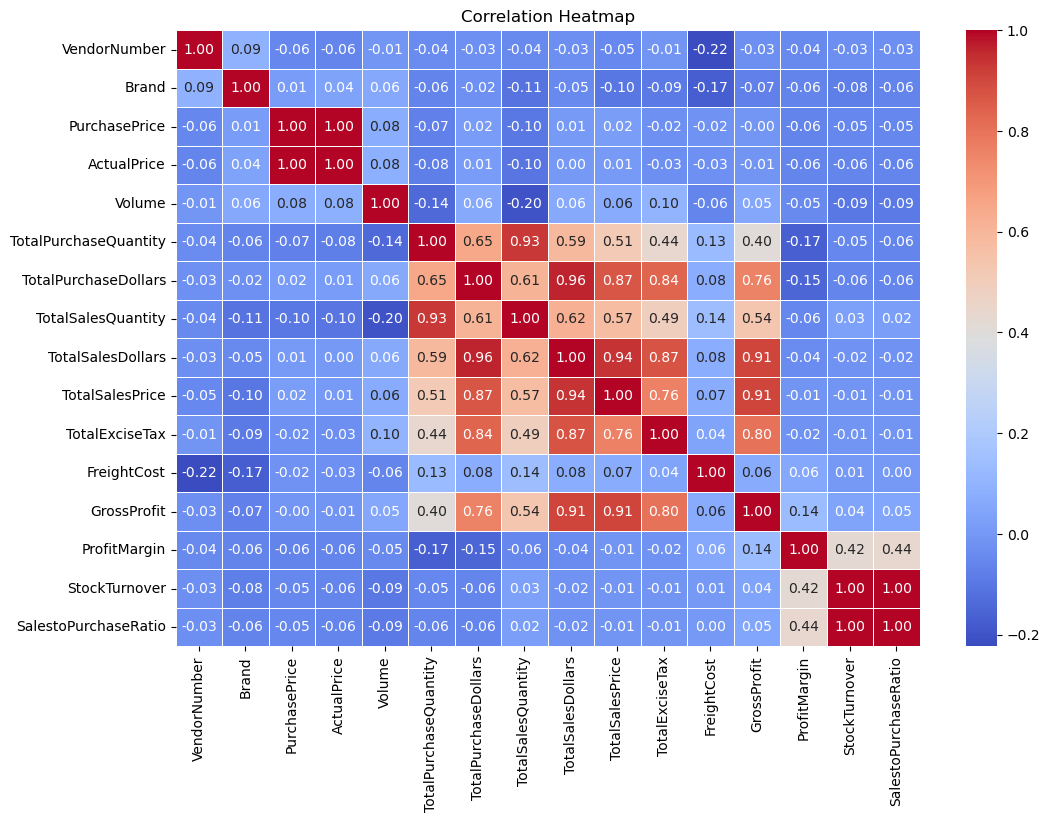

In [34]:
# Corealtion HeatMap
plt.figure(figsize=(12,8))
correlation_matrix=df[numerical_cols].corr()
sns.heatmap(correlation_matrix,annot=True,fmt=".2f",cmap="coolwarm",linewidth=0.5)
plt.title("Correlation Heatmap")
plt.show()

# Corelation Insights

-PurchasePrice has weak corelation with TotalSalesDollars (-0.012) and GrossProfit (-0.016), suggesting that price variation do not significanty impact sales revenue or profit.

-Strong corelation between total purchase quantity and total sales quantity (0.999), confirming efficient inventory turnover.

-Negative corelation between profit margin & Total sales price (-0.179) suggests that as sales price increases, margin decreases, possibly due to competative pricing pressures.

-StockTurnover has weak negative correlation with both Grossprofit(-0.038) and profitMargin (-0.055), indicating that faster turnover does not necessarily result in higher profitability.


# Data Analysis

### Indetify Brands that needs Promotional or Pricing Adjustments which exhibit lower sales performnace but higher profit margins.


In [38]:
brand_performance=df.groupby('description').agg({
    'TotalSalesDollars':'sum',
    'ProfitMargin':'mean'}).reset_index()

In [39]:
low_sales_threshold=brand_performance['TotalSalesDollars'].quantile(0.15)
high_margin_threshold=brand_performance['ProfitMargin'].quantile(0.85)




In [40]:
low_sales_threshold

np.float64(179.9415)

In [41]:
high_margin_threshold

np.float64(85.98664573391407)

In [43]:
# Filter brands with low sales but high profit margin 
target_brands=brand_performance[
(brand_performance['TotalSalesDollars'] <= low_sales_threshold) &
(brand_performance['ProfitMargin'] >= high_margin_threshold)
]

print("Brands with low Sales but high profit Margins:")
display(target_brands.sort_values('TotalSalesDollars'))

Brands with low Sales but high profit Margins:


,description,TotalSalesDollars,ProfitMargin
1245,The Club Strawbry Margarita,15.92,90.766332
442,Crown Royal Apple,23.88,88.107203
1284,Tracia Syrah,44.94,88.495772
1244,The Club Mudslide,51.74,85.987630
500,Dr McGillicuddy's Apple Pie,62.72,96.269133
1054,Riunite Sweet White,65.89,93.777508
1011,Promesses de France CdRhone,71.91,92.337644
457,DeKuyper Mixed Berry Medley,76.93,89.652931
53,Aresti Pnt Nr Curico Vly,79.84,95.891784
1260,Three Olives Grape Vodka,84.15,99.156269


In [56]:
brand_performance=brand_performance[brand_performance['TotalSalesDollars']<10000] # for better visualization

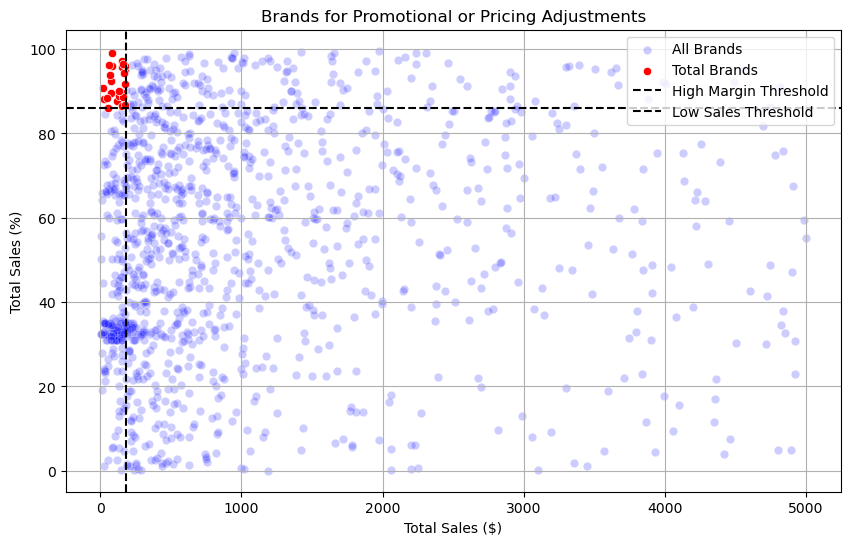

In [58]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=brand_performance,x='TotalSalesDollars',y='ProfitMargin',color="Blue", label="All Brands",alpha=0.2)
sns.scatterplot(data=target_brands,x='TotalSalesDollars',y="ProfitMargin",color="red",label="Total Brands")

plt.axhline(high_margin_threshold,linestyle='--',color='black',label="High Margin Threshold")
plt.axvline(low_sales_threshold,linestyle='--',color='black',label="Low Sales Threshold")
plt.xlabel("Total Sales ($)")
plt.ylabel("Total Sales (%)")
plt.title("Brands for Promotional or Pricing Adjustments")
plt.legend()
plt.grid(True)
plt.show()

### Which vendors and brands demonstrate the highest sales performace?

In [63]:
def format_dollars(value):
    if value >= 1_00_000:
        return f"{value/1_00_000:.2f}M"
    elif value >=1_000:
        return f"{value/ 1_000:.2f}K"
    else:
        return str(value)

In [64]:
# Top Vendors & Brands by Sales Performance
top_vendors=df.groupby("VendorName")["TotalSalesDollars"].sum().nlargest(10)
top_brands=df.groupby("description")["TotalSalesDollars"].sum().nlargest(10)


In [65]:
top_vendors

VendorName
MARTIGNETTI COMPANIES         759428.57
ULTRA BEVERAGE COMPANY LLP    443814.89
JIM BEAM BRANDS COMPANY       415446.71
M S WALKER INC                286033.05
PERFECTA WINES                219396.49
DIAGEO NORTH AMERICA INC      188585.54
BACARDI USA INC               137590.86
STATE WINE & SPIRITS          113633.72
SOUTHERN WINE & SPIRITS NE    102875.55
KOBRAND CORPORATION            94838.62
Name: TotalSalesDollars, dtype: float64

In [66]:
top_brands

description
Jim Beam Traveler               298692.57
Sebastiani Znfdl Sonoma Cnty     85004.91
Crown Royal Hand Slct Barrel     43387.11
Schug Pnt Nr Carneros            43277.85
DiSaronna Amaretto Sour VAP      40357.57
Liberty School Pnt Nr CC         39770.90
Bacardi Twin Pack 2/750mls       38300.84
Hennessy VSOP Cognac + 50mL      37870.80
Paul Dolan 12 Cab Svgn           37175.20
Forefront Pine Ridge Znfdl       36593.48
Name: TotalSalesDollars, dtype: float64

In [67]:
top_brands.apply(lambda x: format_dollars(x))

description
Jim Beam Traveler                2.99M
Sebastiani Znfdl Sonoma Cnty    85.00K
Crown Royal Hand Slct Barrel    43.39K
Schug Pnt Nr Carneros           43.28K
DiSaronna Amaretto Sour VAP     40.36K
Liberty School Pnt Nr CC        39.77K
Bacardi Twin Pack 2/750mls      38.30K
Hennessy VSOP Cognac + 50mL     37.87K
Paul Dolan 12 Cab Svgn          37.18K
Forefront Pine Ridge Znfdl      36.59K
Name: TotalSalesDollars, dtype: object

In [68]:
top_vendors.apply(lambda x: format_dollars(x))

VendorName
MARTIGNETTI COMPANIES          7.59M
ULTRA BEVERAGE COMPANY LLP     4.44M
JIM BEAM BRANDS COMPANY        4.15M
M S WALKER INC                 2.86M
PERFECTA WINES                 2.19M
DIAGEO NORTH AMERICA INC       1.89M
BACARDI USA INC                1.38M
STATE WINE & SPIRITS           1.14M
SOUTHERN WINE & SPIRITS NE     1.03M
KOBRAND CORPORATION           94.84K
Name: TotalSalesDollars, dtype: object

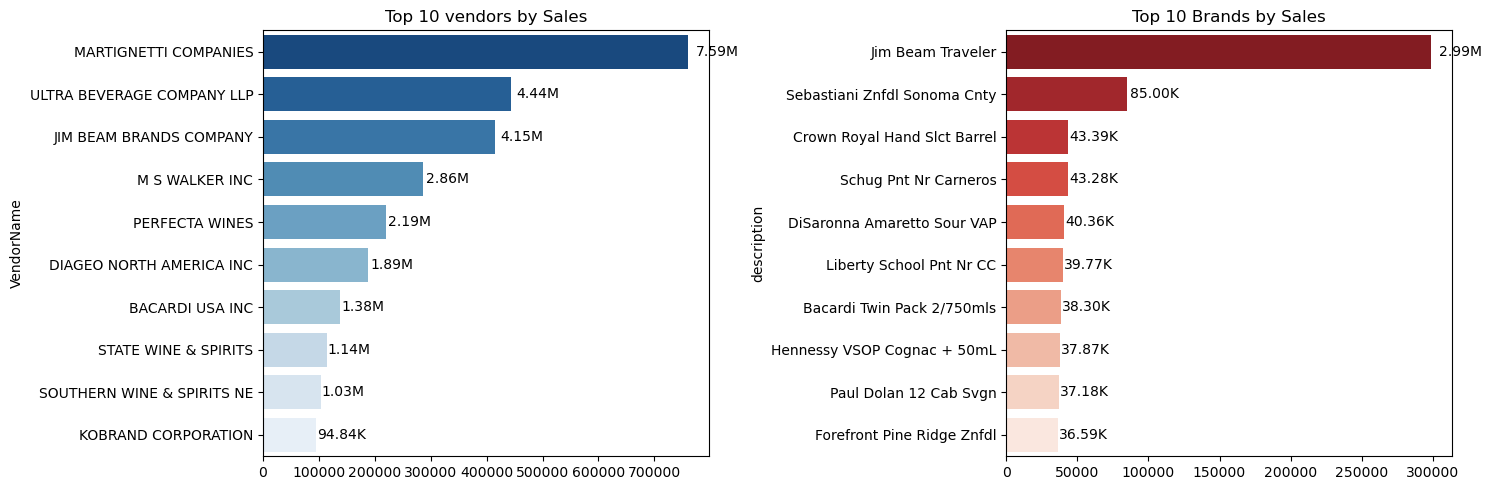

In [73]:
plt.figure(figsize=(15,5))

# Plot for Top Vendors
plt.subplot(1,2,1)
ax1=sns.barplot(y=top_vendors.index,x=top_vendors.values, palette="Blues_r")
plt.title("Top 10 vendors by Sales")

for bar in axl.patches:
    ax1.text(bar.get_width() + (bar.get_width()*0.02),
             bar.get_y() + bar.get_height()/2,
             format_dollars(bar.get_width()),
             ha='left',va='center',fontsize=10,color='black')
#Plot for top Brands
plt.subplot(1,2,2)
ax2=sns.barplot(y=top_brands.index.astype(str),x=top_brands.values,palette="Reds_r")
plt.title("Top 10 Brands by Sales")

for bar in ax2.patches:
    ax2.text(bar.get_width() + (bar.get_width()*0.02),
              bar.get_y() + bar.get_height()/2,
              format_dollars(bar.get_width()),
              ha='left',va='center',fontsize=10,color='black')

plt.tight_layout()
plt.show()

### Which vendors contribute the most to total purchase dollars?

In [80]:
vendor_performance=df.groupby('VendorName').agg({
    'TotalPurchaseDollars':'sum',
    'GrossProfit':'sum',
    'TotalSalesDollars':'sum'
}).reset_index()

In [81]:
vendor_performance

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars
0,ALISA CARR BEVERAGES,16146.99,6263.00,22409.99
1,ATLANTIC IMPORTING COMPANY,3230.68,2528.28,5758.96
2,BACARDI USA INC,48790.84,88800.02,137590.86
3,BANFI PRODUCTS CORP,1783.86,1561.52,3345.38
4,BLACK PRINCE DISTILLERY INC,4288.20,3981.54,8269.74
...,...,...,...,...
77,VINILANDIA USA,5151.58,19390.28,24541.86
78,VRANKEN AMERICA,2554.04,2546.75,5100.79
79,WESTERN SPIRITS BEVERAGE CO,17191.84,10829.30,28021.14
80,WILLIAM GRANT & SONS INC,16717.12,10600.88,27318.00


In [113]:
vendor_performance['PurchaseContribution%']=vendor_performance['TotalPurchaseDollars']/vendor_performance['TotalPurchaseDollars'].sum()*100

In [114]:
vendor_performance=round(vendor_performance.sort_values('PurchaseContribution%',ascending=False),2)

In [115]:
#Disple top 10 vendors
top_vendors=vendor_performance.head(10)
top_vendors['TotalPurchaseDollars']=top_vendors['TotalPurchaseDollars'].apply(format_dollars)
top_vendors['TotalSalesDollars']=top_vendors['TotalSalesDollars'].apply(format_dollars)
top_vendors['GrossProfit']=top_vendors['GrossProfit'].apply(format_dollars)


In [116]:
top_vendors

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%
35,MARTIGNETTI COMPANIES,4.24M,3.35M,7.59M,22.61
26,JIM BEAM BRANDS COMPANY,2.33M,1.82M,4.15M,12.44
73,ULTRA BEVERAGE COMPANY LLP,2.08M,2.36M,4.44M,11.07
44,PERFECTA WINES,1.40M,79.06K,2.19M,7.48
32,M S WALKER INC,1.18M,1.68M,2.86M,6.30
14,DIAGEO NORTH AMERICA INC,1.11M,77.93K,1.89M,5.90
28,KOBRAND CORPORATION,55.19K,39.65K,94.84K,2.94
2,BACARDI USA INC,48.79K,88.80K,1.38M,2.60
63,STATE WINE & SPIRITS,43.06K,70.57K,1.14M,2.29
39,MOET HENNESSY USA INC,40.48K,26.98K,67.46K,2.16


In [117]:
top_vendors['PurchaseContribution%'].sum()

np.float64(75.78999999999999)

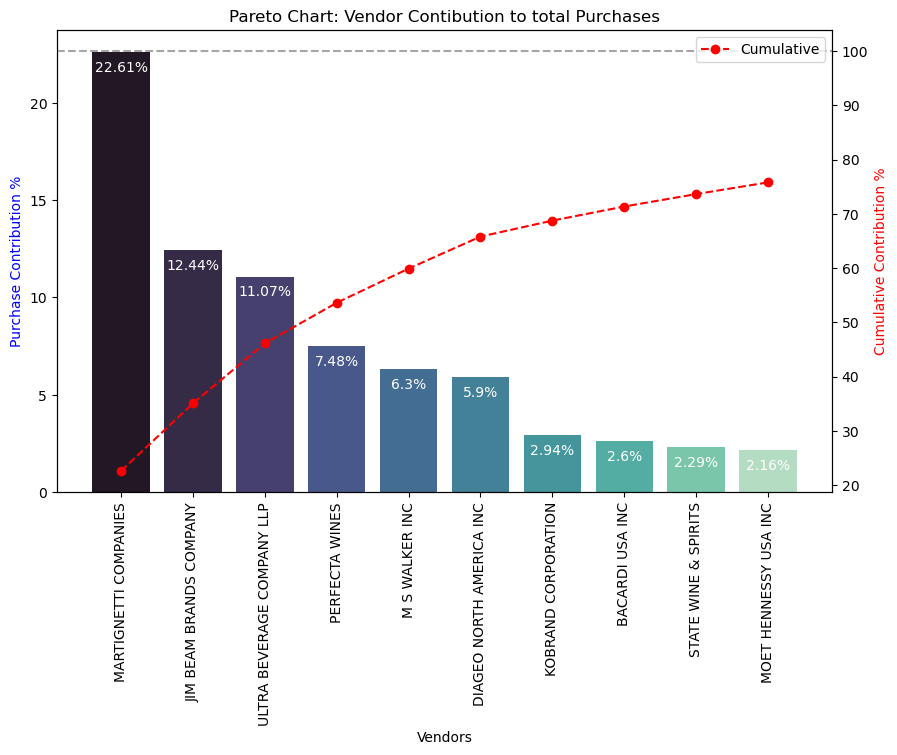

In [128]:
top_vendors['Cumulative_Contribution%']=top_vendors['PurchaseContribution%'].cumsum()

fig,ax1=plt.subplots(figsize=(10,6))
# Bar plot for purchase Contribution%
sns.barplot(x=top_vendors['VendorName'],y=top_vendors['PurchaseContribution%'],palette="mako",ax=ax1)
for i, value in enumerate(top_vendors['PurchaseContribution%']):
    ax1.text(i,value-1,str(value)+'%',ha='center',fontsize=10,color='white')

#Line Plot for Cumulative Contribution
ax2=ax1.twinx()
ax2.plot(top_vendors['VendorName'],top_vendors['Cumulative_Contribution%'],color='red',marker='o',linestyle='dashed',label='Cumulative')

ax1.set_xticklabels(top_vendors['VendorName'],rotation=90)
ax1.set_ylabel('Purchase Contribution %',color='blue')
ax2.set_ylabel('Cumulative Contribution %',color='red')
ax1.set_xlabel('Vendors')
ax1.set_title('Pareto Chart: Vendor Contibution to total Purchases')
ax2.axhline(y=100,color='gray',linestyle='dashed',alpha=0.7)
ax2.legend(loc='upper right')

plt.show()

### How much of total Procurement is dependent on the top vendors?

In [131]:
print(f"Total Purchase Contribution of top 10 vendprs is {round(top_vendors['PurchaseContribution%'].sum(),2)} %")

Total Purchase Contribution of top 10 vendprs is 75.79 %


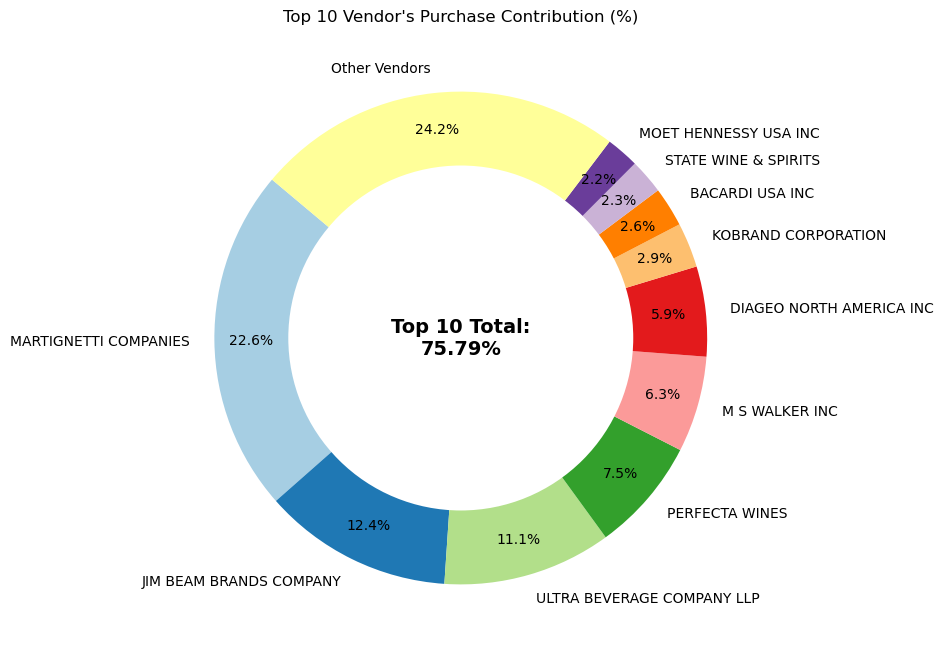

In [136]:
vendors=list(top_vendors['VendorName'].values)
purchase_contribution=list(top_vendors['PurchaseContribution%'].values)
total_contribution=sum(purchase_contribution)
remaining_contribution=100-total_contribution

#Append "Other vendors" category
vendors.append("Other Vendors")
purchase_contribution.append(remaining_contribution)

#Donut Chart
fig,ax=plt.subplots(figsize=(8,8))
wedges,texts,autotexts=ax.pie(purchase_contribution,labels=vendors,autopct='%1.1f%%',
                             startangle=140,pctdistance=0.85,colors=plt.cm.Paired.colors)

#Draw a white circle in the center to create a "donut" effect
center_circle=plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(center_circle)

#Add Total Contribution Anootation in the center
plt.text(0,0,f"Top 10 Total:\n{total_contribution :.2f}%",fontsize=14,fontweight='bold',ha='center',va='center')

plt.title("Top 10 Vendor's Purchase Contribution (%)")
plt.show()


### Does purchasing in bulk reduce the unit price, and what is the optimal purchase volume for cost savings?

In [138]:
df['UnitPurchasePrice']=df['TotalPurchaseDollars']/df['TotalPurchaseQuantity']
df

,VendorNumber,VendorName,Brand,description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalestoPurchaseRatio,UnitPurchasePrice
0,12546,JIM BEAM BRANDS COMPANY,1476,Jim Beam Traveler,16.05,21.99,1750.0,11569,185682.45,13143.0,298692.57,80397.56,24147.54,123880.97,113010.12,37.834928,1.136053,1.608620,16.05
1,4425,MARTIGNETTI COMPANIES,36380,Sebastiani Znfdl Sonoma Cnty,6.49,9.99,750.0,12309,79885.41,8509.0,85004.91,23936.04,953.43,144929.24,5119.50,6.022593,0.691283,1.064086,6.49
2,4425,MARTIGNETTI COMPANIES,25163,Colavita Pnt Nr,3.24,4.99,750.0,10367,33589.08,7069.0,35274.31,5429.12,794.14,144929.24,1685.23,4.777500,0.681875,1.050172,3.24
3,3960,DIAGEO NORTH AMERICA INC,2492,Crown Royal Hand Slct Barrel,41.66,54.99,750.0,797,33203.02,789.0,43387.11,5993.91,621.41,257032.07,10184.09,23.472617,0.989962,1.306722,41.66
4,4425,MARTIGNETTI COMPANIES,24369,Forefront Pine Ridge Znfdl,8.21,11.99,750.0,3898,32002.58,3052.0,36593.48,15119.39,340.80,144929.24,4590.90,12.545678,0.782966,1.143454,8.21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1384,3960,DIAGEO NORTH AMERICA INC,2626,Crown Royal Apple,1.42,1.99,50.0,2,2.84,12.0,23.88,1.99,0.63,257032.07,21.04,88.107203,6.000000,8.408451,1.42
1385,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,3.0,5.97,5.97,0.33,27100.41,3.33,55.778894,1.500000,2.261364,1.32
1386,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,128.0,62.72,0.98,6.72,50293.62,60.38,96.269133,21.333333,26.803419,0.39
1387,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,8.0,15.92,9.95,1.68,257032.07,14.45,90.766332,8.000000,10.829932,1.47


In [141]:
df['OrderSize']=pd.qcut(df["TotalPurchaseQuantity"],q=3,labels=["Small","Medium","Large"])

In [143]:
df[['OrderSize','TotalPurchaseQuantity']]

,OrderSize,TotalPurchaseQuantity
0,Large,11569
1,Large,12309
2,Large,10367
3,Large,797
4,Large,3898
...,...,...
1384,Small,2
1385,Small,2
1386,Small,6
1387,Small,1


In [145]:
df.groupby('OrderSize')[['UnitPurchasePrice']].mean()

,UnitPurchasePrice
OrderSize,
Small,39.124489
Medium,20.646161
Large,12.383210


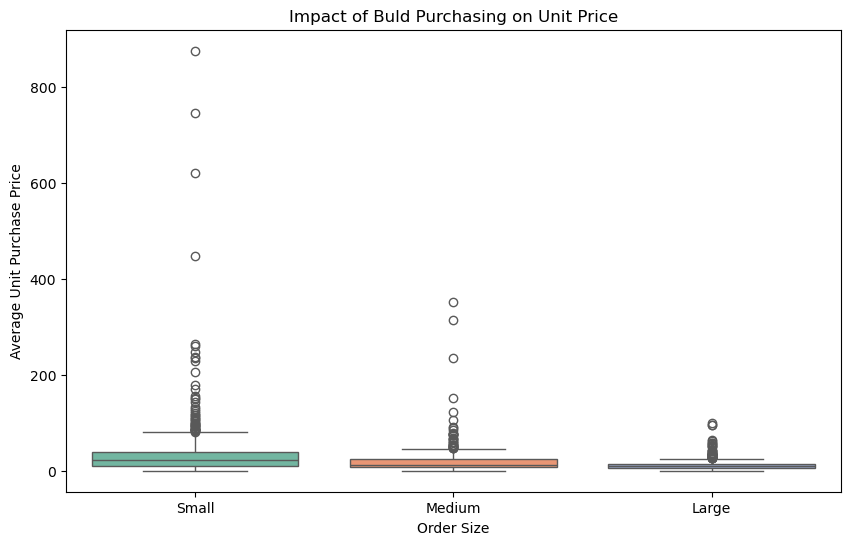

In [146]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x="OrderSize",y="UnitPurchasePrice",palette="Set2")
plt.title("Impact of Buld Purchasing on Unit Price")
plt.xlabel("Order Size")
plt.ylabel("Average Unit Purchase Price")
plt.show()

-Vendors buying in bulk (Large Order Size) get the lowest unit price ($10.78 per unit), meaning higher margins if they can manage inventory efficiently.

-The price difference between Samll and Large orders is substantial (~72% reduction in unit cost)

-This suggests that bulk pricing strategies successfully encourage vendors to purchase in larger volumes, leading to higher overall sales despite lower per-unit revenue.


### Which Vendors have low inventory turnover,indicating excess stock and slow moving products?


In [155]:
df[df['StockTurnover']<1].groupby('VendorName')[['StockTurnover']].mean().sort_values('StockTurnover',ascending=True).head(10)

,StockTurnover
VendorName,
LAIRD & CO,0.666667
SURVILLE ENTERPRISES CORP,0.666667
WINE GROUP INC,0.666667
CONSTELLATION BRANDS INC,0.677904
R.P.IMPORTS INC,0.681159
THE IMPORTED GRAPE LLC,0.685714
SEA BREEZE CELLARS LLC,0.694444
POVERTY LANE ORCHARDS,0.695652
STE MICHELLE WINE ESTATES,0.709722


### What is the 95% confidence intervals for profit margins of top-performing and low-performing vendors.


In [171]:
top_threshold=df["TotalSalesDollars"].quantile(0.75)
low_threshold=df["TotalSalesDollars"].quantile(0.25)

top_vendors=df[df["TotalSalesDollars"]>= top_threshold]["ProfitMargin"].dropna()
low_vendors=df[df["TotalSalesDollars"]<= low_threshold]["ProfitMargin"].dropna()
top_vendors


0       37.834928
1        6.022593
2        4.777500
3       23.472617
4       12.545678
          ...    
980     94.838036
1023    95.581430
1095    96.803577
1135    99.011049
1300    99.038208
Name: ProfitMargin, Length: 348, dtype: float64

In [172]:
low_vendors

661      0.297753
691      0.486040
709      1.743841
711      1.405405
716     14.312796
          ...    
1384    88.107203
1385    55.778894
1386    96.269133
1387    90.766332
1388    99.156269
Name: ProfitMargin, Length: 349, dtype: float64

In [174]:
def confidence_internval(data,confidence=0.95):
    mean_val=np.mean(data)
    std_err=np.std(data,ddof=1)/np.sqrt(len(data)) #Standard error
    t_critical=stats.t.ppf((1+confidence)/2,df=len(data)-1)
    margin_of_error=t_critical*std_err
    return mean_val,mean_val-margin_of_error,mean_val+margin_of_error

Top vendors 95% CI: (52.36,58.17,Mean:55.27)
Low vendors 95% CI: (45.57,51.04,Mean:48.30)


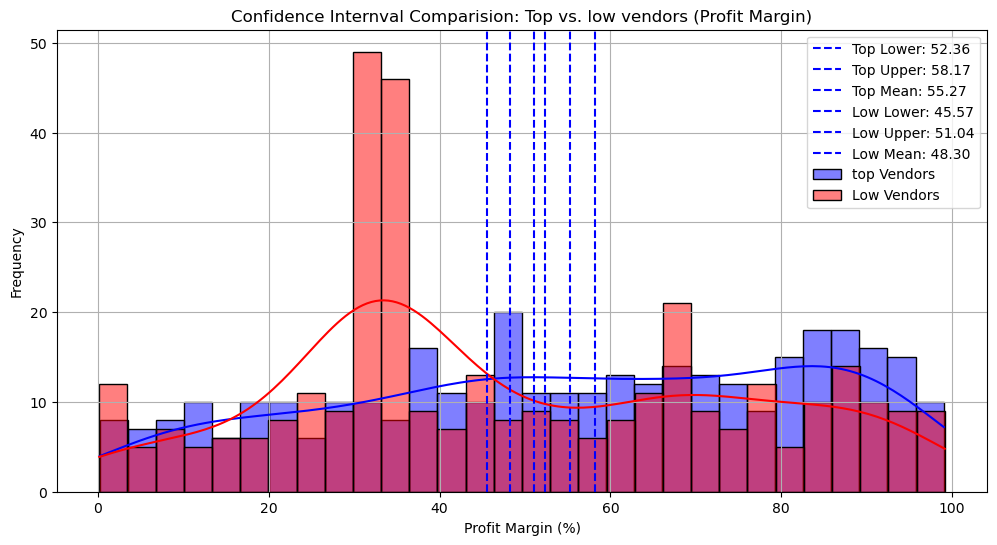

In [179]:
top_mean,top_lower,top_upper=confidence_internval(top_vendors)
low_mean,low_lower,low_upper=confidence_internval(low_vendors)
print(f"Top vendors 95% CI: ({top_lower:.2f},{top_upper:.2f},Mean:{top_mean:.2f})")
print(f"Low vendors 95% CI: ({low_lower:.2f},{low_upper:.2f},Mean:{low_mean:.2f})")


plt.figure(figsize=(12,6))

#Top Vendors Plot
sns.histplot(top_vendors,kde=True,color='blue',bins=30,alpha=0.5,label="top Vendors")
plt.axvline(top_lower,color="blue",linestyle="--",label=f"Top Lower: {top_lower:.2f}")
plt.axvline(top_upper,color="blue",linestyle="--",label=f"Top Upper: {top_upper:.2f}")
plt.axvline(top_mean,color="blue",linestyle='--',label=f"Top Mean: {top_mean:.2f}")

#Low Vendors Plot
sns.histplot(low_vendors,kde=True,color="red",bins=30,alpha=0.5,label="Low Vendors")
plt.axvline(low_lower,color="blue",linestyle="--",label=f"Low Lower: {low_lower:.2f}")
plt.axvline(low_upper,color="blue",linestyle="--",label=f"Low Upper: {low_upper:.2f}")
plt.axvline(low_mean,color="blue",linestyle='--',label=f"Low Mean: {low_mean:.2f}")

#Finalize Plot
plt.title("Confidence Internval Comparision: Top vs. low vendors (Profit Margin)")
plt.xlabel("Profit Margin (%)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

# Is there a significant difference in profit margins between top-performing and low-performing vendors?

Hypothesis:

Ho(Null Hypothesis): There is no signifinant difference in the mean profit margins of top-performing and low-performing vendors.
H1(Alternative Hypothesis): The mean profit margins of top-performing and low-performing vendors are signifiantly different.


In [181]:
top_threshold=df["TotalSalesDollars"].quantile(0.75)
low_threshold=df["TotalSalesDollars"].quantile(0.25)

top_vendors=df[df["TotalSalesDollars"]>=top_threshold]["ProfitMargin"].dropna()
low_vendors=df[df["TotalSalesDollars"]>=low_threshold]["ProfitMargin"].dropna()

#Perform Two-Sample T-test
t_stat,p_value=ttest_ind(top_vendors,low_vendors,equal_var=False)

#Print results
print(f"T-Statistic: {t_stat:.4f},P-Value: {p_value:.4f}")
if p_value < 0.05:
    print("Reject Ho: There is a significant difference in profit margins between top and low-performing vendors.")
else:
    print("Fail to Reject Ho: No significant difference in profit margins")

T-Statistic: -0.7141,P-Value: 0.4755
Fail to Reject Ho: No significant difference in profit margins


NameError: name 'vendor_sales_summary' is not defined